# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

/tmp/ipykernel_796977/3753375791.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,472,105,50,93,173,54,4,222,30,25,159,254,735,206,83,4,12,186,184
1,745,85,43,69,141,62,7,152,44,19,145,178,341,179,84,1,4,181,184
2,242,85,42,59,132,58,7,149,46,19,144,166,320,172,83,8,4,179,182
3,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
4,43,93,37,76,183,63,8,164,40,20,134,191,405,139,67,4,7,192,197
5,262,89,40,60,131,56,6,118,56,17,137,143,209,153,65,10,8,193,199
6,47,85,42,66,122,54,6,148,46,19,141,172,317,174,88,6,14,180,182
7,215,90,39,86,169,62,7,162,41,20,131,194,388,147,74,1,22,185,191
8,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
9,674,92,37,80,180,67,8,154,43,19,129,180,353,144,69,6,9,190,195


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,414.941712,93.420765,44.704918,81.690346,168.251366,61.448087,8.289617,168.637523,40.965392,20.557377,147.617486,188.499089,438.936248,174.400729,72.570128,5.998179,12.673953,188.872495,195.480874
std,243.158348,8.079419,6.189849,15.692957,33.726447,7.724236,3.771036,33.173369,7.795556,2.589790,14.634580,31.623794,176.781602,32.595616,7.533447,4.758588,8.840707,6.361534,7.644359
min,0.000000,73.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,212.000000,87.000000,39.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,135.000000,168.000000,319.000000,148.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,403.000000,92.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,71.000000,5.000000,11.000000,188.000000,197.000000
75%,621.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,578.000000,197.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,333.000000,138.000000,49.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# The data is scaled to have a mean of 0 and a variance of 1 so
# that the model can converge faster.
# Because we dont have null values in our dataset and all are
# numerical features we dont need to do nothing else.
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters: {'C': 100}
Accuracy: 0.7946127946127947
F1 Score: 0.791546492175423


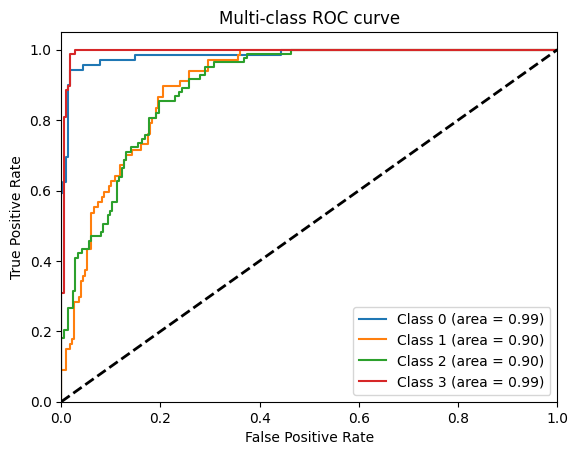

In [7]:
### YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000]  # Regularization strength
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_transformed, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_transformed)
y_pred_proba = grid_search.predict_proba(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# There was a problem with versions of scikitplot and scipy so 
# I will use just matplotlib to plot the ROC curve.

y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %i (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()

In [8]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

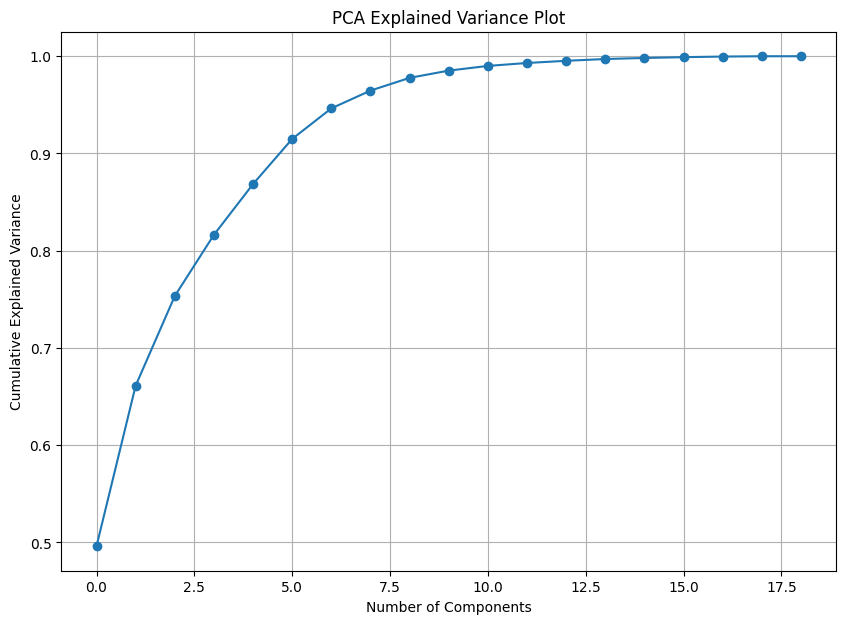

In [9]:
### YOUR CODE HERE

from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train_transformed)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Plot')
plt.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [10]:
### YOUR CODE HERE

# I will select 12 components because after that the variance explained 
# by the components is not increasing significantly.

pca = PCA(n_components=12)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', pca)
])

X_train_pca = pipeline.fit_transform(X_train)
X_test_pca = pipeline.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best hyperparameters: {'C': 1000}
Accuracy: 0.7441077441077442
F1 Score: 0.741820989757241


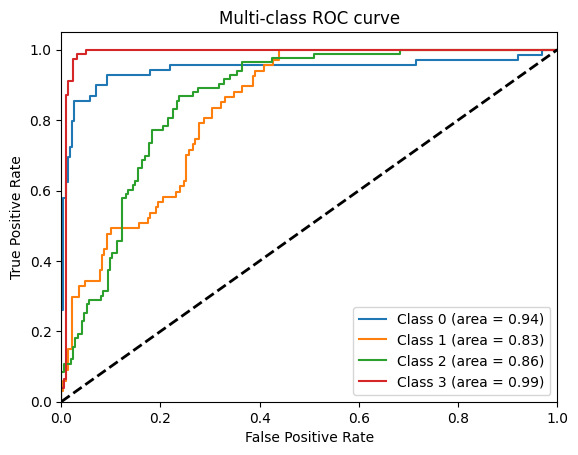

In [11]:
### YOUR CODE HERE

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000]  # Regularization strength
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_pca, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_C = grid_search.best_params_['C']

y_pred = grid_search.predict(X_test_pca)
y_pred_proba = grid_search.predict_proba(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# There was a problem with versions of scikitplot and scipy so 
# I will use just matplotlib to plot the ROC curve.

y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %i (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [12]:
# YOUR CODE HERE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

dt = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': range(1, 15)} # Maximum depth of the tree

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_['max_depth']
print(f"The best depth is {best_depth}")

dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)

y_pred = dt_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


The best depth is 6
Accuracy: 0.6464646464646465
F1 Score: 0.6419490815152226


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/brayand/Storage/School/master-machine-learning-homeworks/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


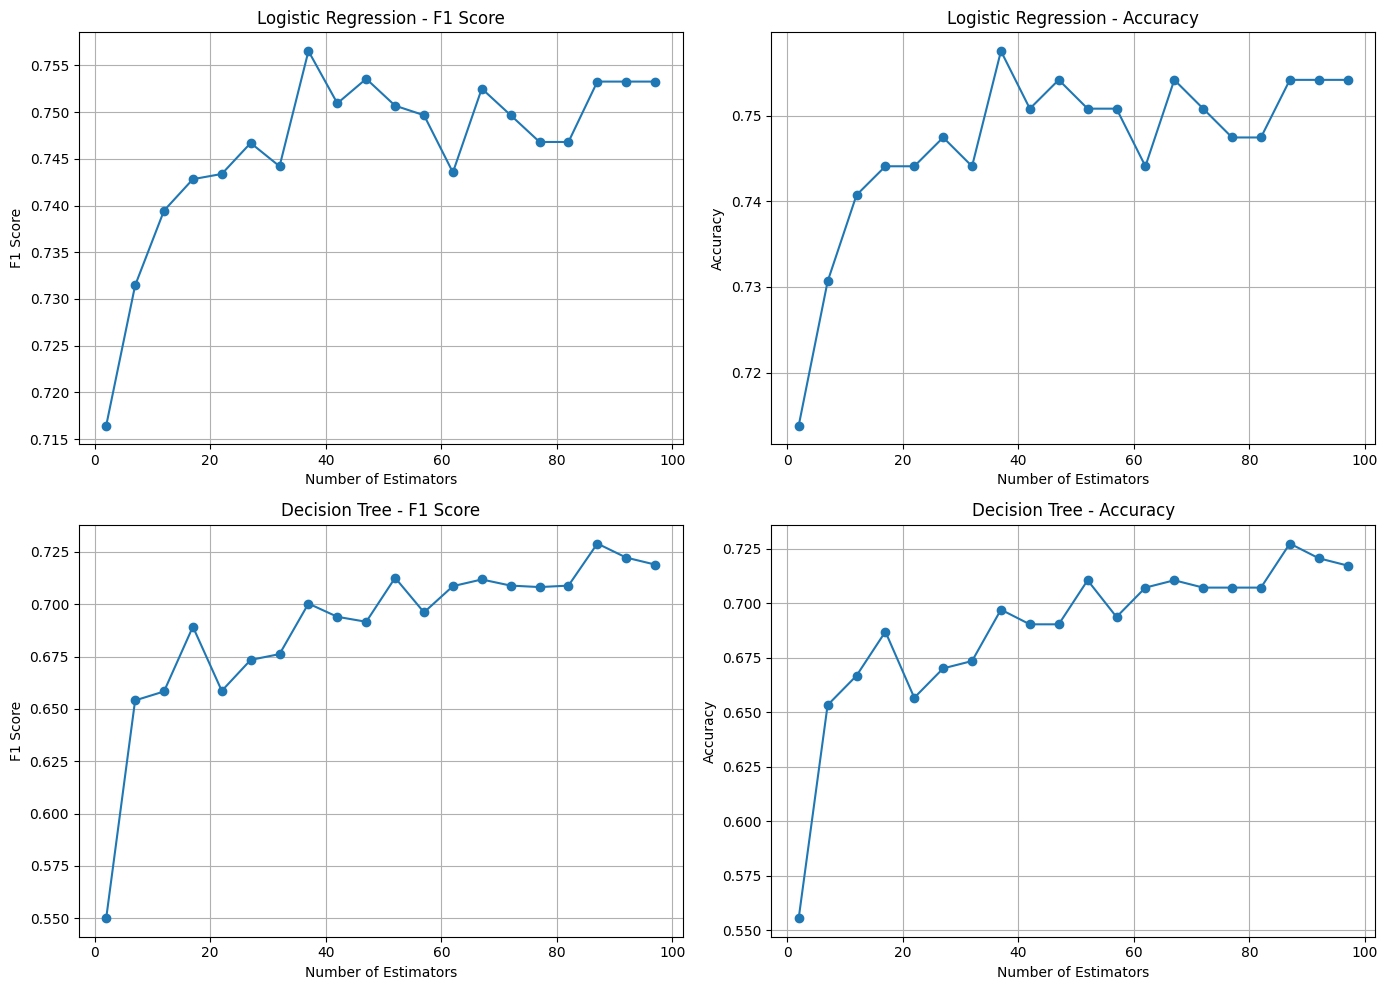

In [16]:
# YOUR CODE HERE

def bootstrap(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]
    

bootstraps = [bootstrap(X_train_pca, y_train) for _ in range(100)]

best_log_reg_params = {'C': best_C}
best_dt_params = {'max_depth': best_depth}

log_reg_models = [LogisticRegression(**best_log_reg_params, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500) for _ in range(100)]
dt_models = [DecisionTreeClassifier(**best_dt_params) for _ in range(100)]

log_reg_ensemble_predictions = []
dt_ensemble_predictions = []

for n in range(100):
    X_boot, y_boot = bootstraps[n]
    log_reg_models[n].fit(X_boot, y_boot)
    dt_models[n].fit(X_boot, y_boot)
    log_reg_ensemble_predictions.append(log_reg_models[n].predict(X_test_pca))
    dt_ensemble_predictions.append(dt_models[n].predict(X_test_pca))

log_reg_accuracy_scores = []
dt_accuracy_scores = []
log_reg_f1_scores = []
dt_f1_scores = []

for n in range(2, 101, 5):

    log_reg_ensemble_pred = np.array(log_reg_ensemble_predictions[:n])
    dt_ensemble_pred = np.array(dt_ensemble_predictions[:n])

    log_reg_ensemble_pred = np.swapaxes(log_reg_ensemble_pred, 0, 1)
    dt_ensemble_pred = np.swapaxes(dt_ensemble_pred, 0, 1)

    log_reg_ensemble_pred = np.array([max(set(pred), key=list(pred).count) for pred in log_reg_ensemble_pred])
    dt_ensemble_pred = np.array([max(set(pred), key=list(pred).count) for pred in dt_ensemble_pred])    

    log_reg_accuracy = accuracy_score(y_test, log_reg_ensemble_pred)
    dt_accuracy = accuracy_score(y_test, dt_ensemble_pred)

    f1_log_reg = f1_score(y_test, log_reg_ensemble_pred, average='weighted')
    f1_dt = f1_score(y_test, dt_ensemble_pred, average='weighted')

    log_reg_accuracy_scores.append(log_reg_accuracy)
    dt_accuracy_scores.append(dt_accuracy)
    log_reg_f1_scores.append(f1_log_reg)
    dt_f1_scores.append(f1_dt)

ensemble_sizes = list(range(2, 101, 5))

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(ensemble_sizes, log_reg_f1_scores, label='F1 Score', marker='o')
plt.title('Logistic Regression - F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(ensemble_sizes, log_reg_accuracy_scores, label='Accuracy', marker='o')
plt.title('Logistic Regression - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(ensemble_sizes, dt_f1_scores, label='F1 Score', marker='o')
plt.title('Decision Tree - F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(ensemble_sizes, dt_accuracy_scores, label='Accuracy', marker='o')
plt.title('Decision Tree - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analysing the plots we can see that the best number of estimators
# for the logistic regression is near to 40, but after that the accuracy
# and the f1 score are diverging, this is because this kind of model has
# a low variance so it is not necessary to use a lot of estimators.

# On the other hand, the decision tree model has a high variance so it is
# necessary to use a lot of estimators to get a good accuracy and f1 score.
# In the case of the plots, the best number of estimators is near to 100,
# but using more estimators the accuracy and the f1 score could be better.


# Optimal parameters for an individual Decision Tree might not be optimal 
# when the tree is used within a Bagging ensemble. This is because Bagging 
# changes the model's context by reducing variance through averaging predictions 
# from multiple models trained on bootstrapped subsets. While individual trees 
# might benefit from certain parameters to minimize overfitting or maximize accuracy,
# the ensemble as a whole could perform better with different settings due to
# the variance reduction and diversity among the models in the ensemble. Therefore,
# it's often necessary to re-tune model parameters specifically for their use in an ensemble.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
# YOUR CODE HERE